# Playing ChainerCV

## Reference:
- https://github.com/chainer/chainercv
- http://www.iconsplace.com/black-icons/letter-f-icon
- https://qiita.com/mitmul/items/1e35fba085eb07a92560

## import 

In [1]:
from imageio import imread, imsave
import skimage
import numpy as np
import matplotlib
from matplotlib import pyplot as plt 
%matplotlib inline
from IPython.display import Image
import chainer
from chainer.datasets import cifar
import chainercv
from chainercv import transforms

## check version

In [2]:
print('chainercv',chainercv.__version__)
print('matplotlib',matplotlib.__version__)

chainercv 0.8.0
matplotlib 2.2.0


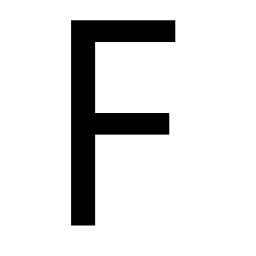

In [3]:
# image 'letterF.png' is taken from http://www.iconsplace.com/black-icons/letter-f-icon
Image(filename='letterF.png')

In [4]:
letter = imread('letterF.png')
letter.shape

(256, 256, 4)

# Flip letter 'F'  in horizontal direction

## using numpy.flipud

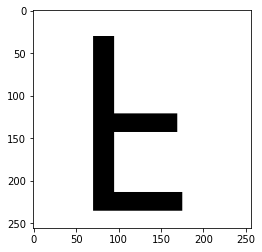

In [5]:
flip_np=np.flipud(letter)
plt.imshow(flip_np)

# using chainercv.transforms.flip

uint8


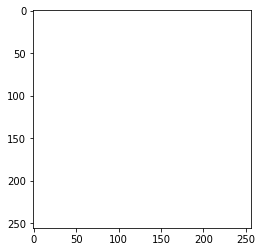

In [6]:
img=transforms.flip(letter, y_flip=False, x_flip=True, copy=True)
plt.imshow(img)

Ops... we can't see any of shape of F.... 

# Let's examine another example

In [7]:
train_dataset, test_dataset = cifar.get_cifar10(scale=255.)

## get an example

In [8]:
example=train_dataset[0][0].astype(np.uint8)
example=example.transpose(2,1,0)

## show the image

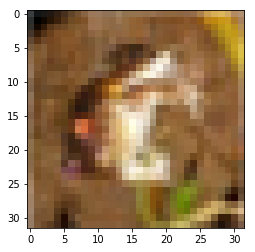

In [9]:
plt.imshow(example)

## using np.flipud

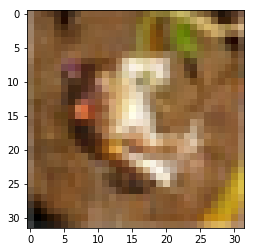

In [12]:
plt.imshow(np.flipud(example))

# Flip the example image in horizontal direction

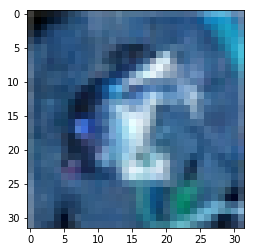

In [13]:
img=transforms.flip(example, y_flip=False, x_flip=True, copy=True)
plt.imshow(img)

Geez this result is not what I want

# Let's read ChainerCV Readme before creating new issues

the Readme.md of https://github.com/chainer/chainercv says...
    
# Data Conventions
- Image
  - The order of color channel is RGB.
  -  Shape is CHW (i.e. (channel, height, width)).
  -  The range of values is [0, 255].

I see. We must convert an image data so that **the shape of the image is CHW**|

uint8


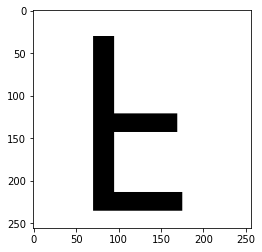

In [18]:
img=transforms.flip(letter.transpose(2,1,0), y_flip=False, x_flip=True, copy=True)
print(img.dtype)
plt.imshow(img.transpose(2,1,0))

# Yes, Got the result I wanted to see

# try to apply an image of cifar10

In [25]:
train_dataset, test_dataset = cifar.get_cifar10(scale=255.)

In [32]:
example=train_dataset[0][0].astype(np.uint8)
example.shape #<- the shape of example is originally CHW

(3, 32, 32)

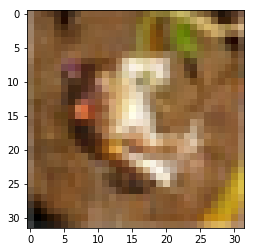

In [34]:
img=transforms.flip(example, y_flip=False, x_flip=True, copy=True)
plt.imshow(img.transpose(2,1,0))

In [30]:
example=train_dataset[0][0].astype(np.uint8)
example=example.transpose(2,1,0)

# Conclusion 
- Sorry, I was quite mistaken.
- image shape is very very important
- I should have read the document in advance using new module